In [5]:
import numpy as np
import homography as h
import filter as f
from PIL import Image
import matplotlib.pyplot as plt
import main as m
from numba import jit, njit

[[ 353.51875305 2677.1673584 ]
 [2207.15000153 2289.2868042 ]
 [ 187.55990028  499.36490774]
 [1573.18437651  304.36507672]]
[[   0.         1717.42310005]
 [1178.89248145 1717.42310005]
 [   0.            0.        ]
 [1178.89248145    0.        ]]


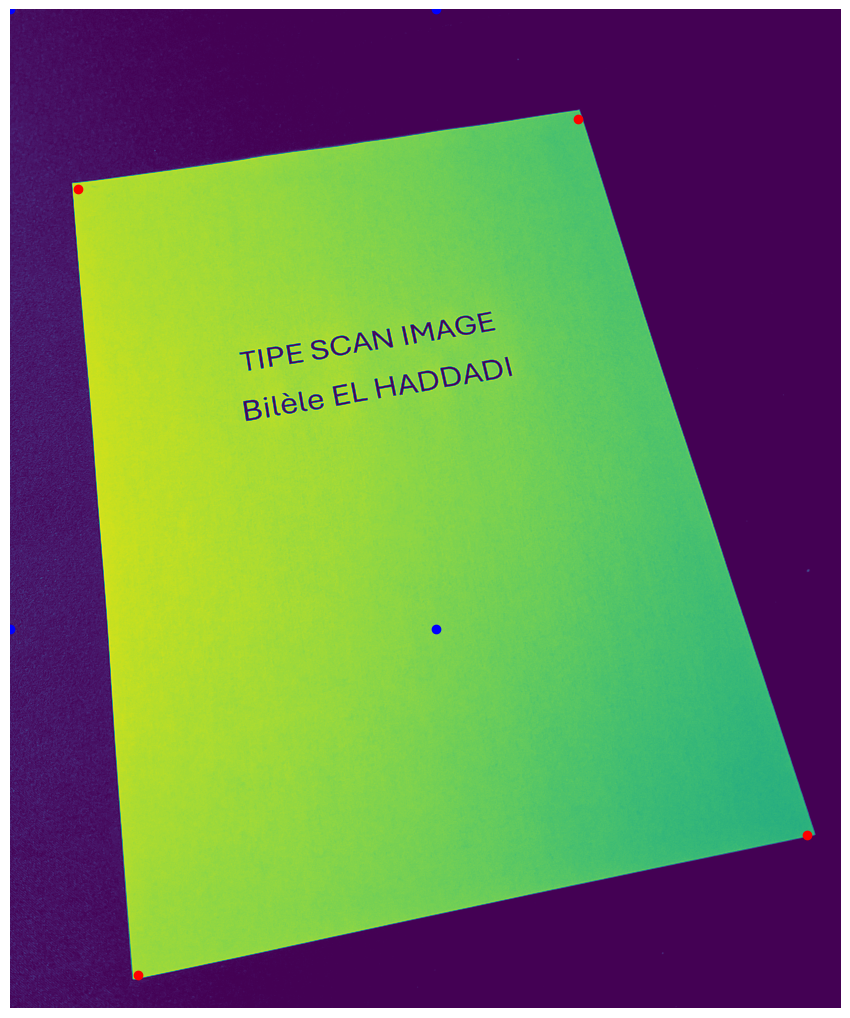

In [6]:
I = np.array(Image.open("images/Feuille4.jpg", mode="r").convert('L'))
H = h.MakeHomographie(I)

In [9]:
FilledH = h.FillBasedOnNeighbour(H)
m.SaveAsPng(FilledH, "./export/homographed")
SI = f.Sauvola(FilledH, 60, .2, 128)

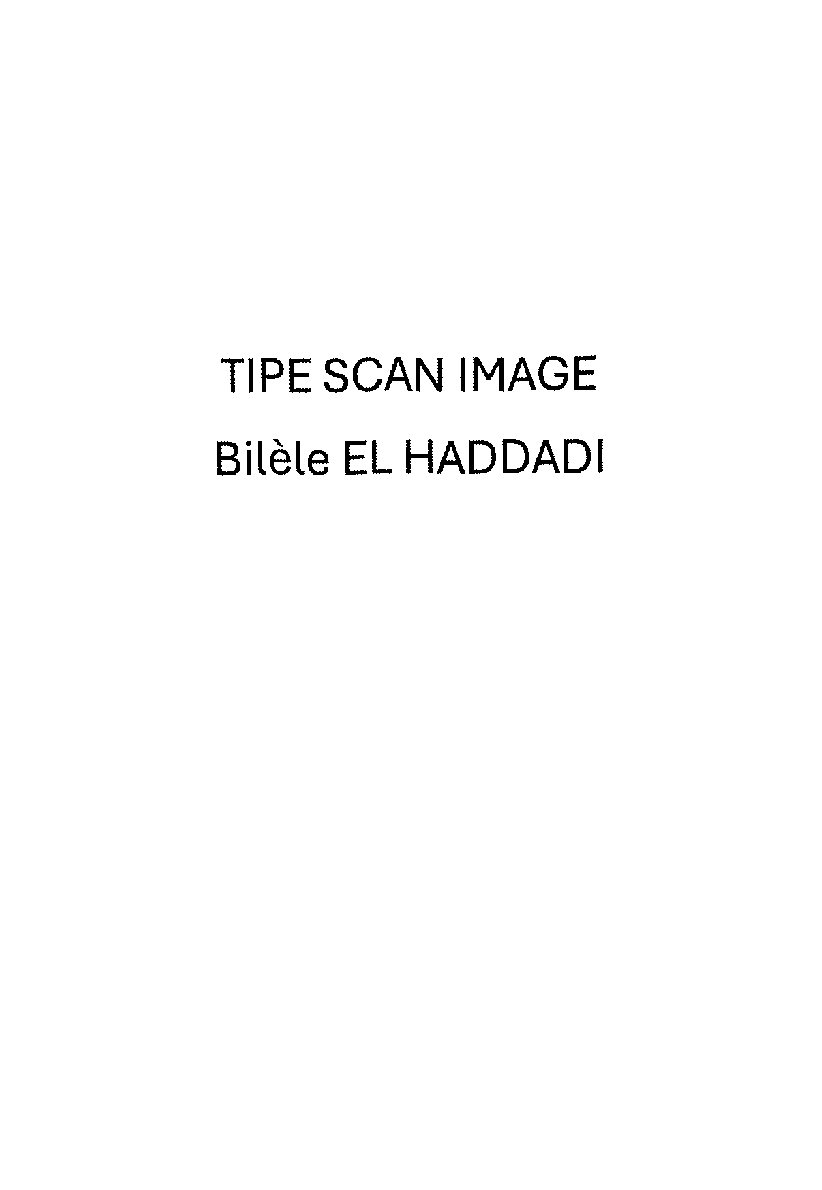

In [10]:
m.Afficher(SI)

In [11]:
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def apply_gaussian_blur(image, kernel_size, sigma=1):
    kernel = gaussian_kernel(kernel_size, sigma)
    padded_image = np.pad(image, kernel_size//2, mode='constant')
    output_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.sum(neighborhood * kernel)

    return output_image

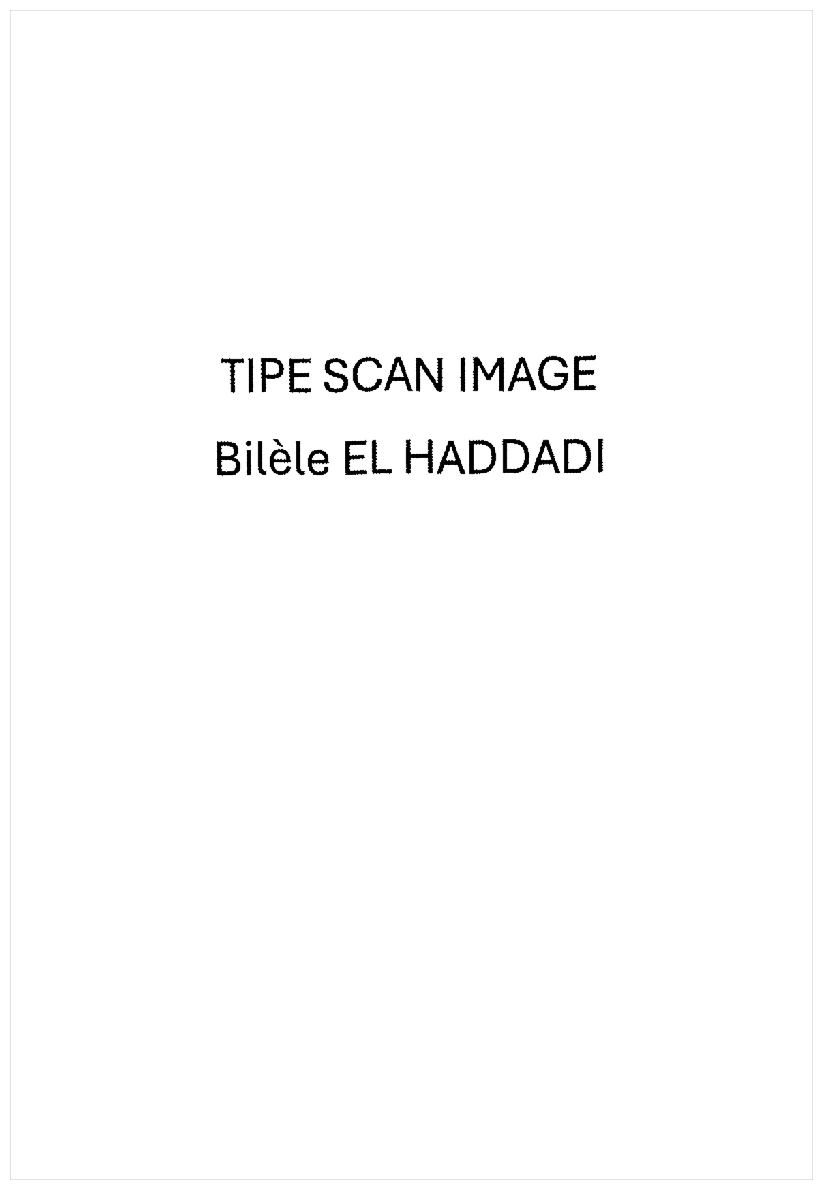

In [12]:
G = apply_gaussian_blur(SI, 5, .5)
m.Afficher(G)

## OCR TESTS

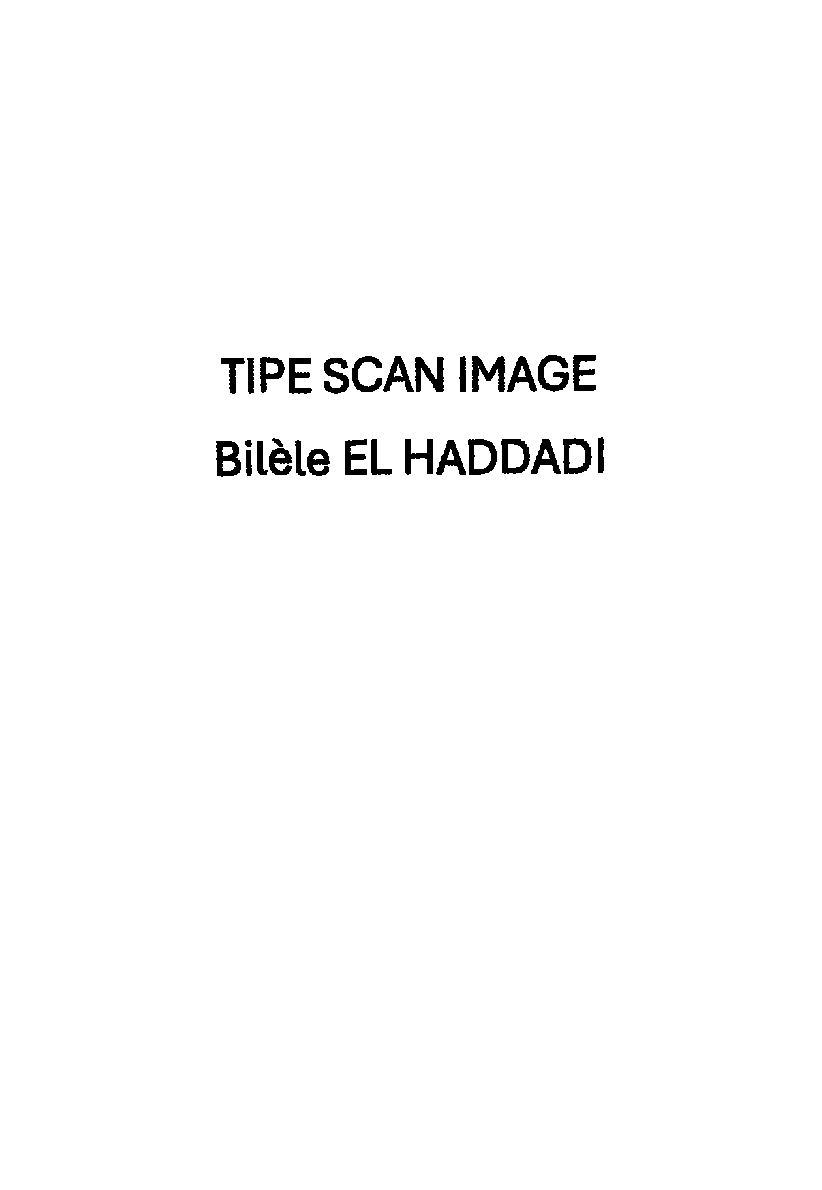

In [13]:
m.Afficher(f.Dilatation(SI, 1))

In [14]:
h.ConnectedComponentLabeling()

AttributeError: module 'homography' has no attribute 'ConnectedComponentLabeling'